In [1]:
import numpy as np
import pandas as pd
from regression import gradient_descent as gd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
file_csv = 'data/kc_house_data.csv'

In [2]:
!head -1 data/kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [3]:
kc = pd.read_csv(file_csv, usecols=['sqft_living', 'price'])
kc.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [4]:
# train/test split
pct_20 = int(kc.shape[0] * .2)
kc_test = kc.loc[:pct_20]
kc_train = kc.loc[pct_20 + 1:]
kc_train.reset_index(drop=True, inplace=True)

In [5]:
kc_train.head()

,price,sqft_living
0,455000.0,1870
1,459500.0,2060
2,371000.0,1610
3,289500.0,2120
4,395000.0,1450


# index

approach2: Gradient Descent
>  Gradient Descent as simple regression <br>
>  Gradient Descent as multivariate regression <br>
>> using 2 features `sqft_living` and `bedrooms` 


<br>

approach1: set Gradient Descent to zero
> prediction, using `sqft_living` and `sqft_basement` features <br>
> prediction, using `sqft_living` and `sqft_above` features

<br><br>

# Gradient Descent

$\hat y = w_0 + x w^T$ <br><br>

$MSE = \frac{1}{2n} \Sigma_{i=1}^{n} (\hat y - y)^2$ <br><br>

$\nabla MSE = \frac{1}{n} [x^T (\hat y - y) ]$


`the code is here -> regression.py -> gradient_descent() func`

## Gradient Descent as simple regression

intercept, w1..wn: [4.61639027e-02 2.62091591e+02]
intercept, w1..wn: [9.88585950e-02 2.60644457e+02]
intercept, w1..wn: [4.20476955e-02 1.06069676e+02]


/tmp/ipykernel_2391/3217633997.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax1.set_yticklabels(locs_label);


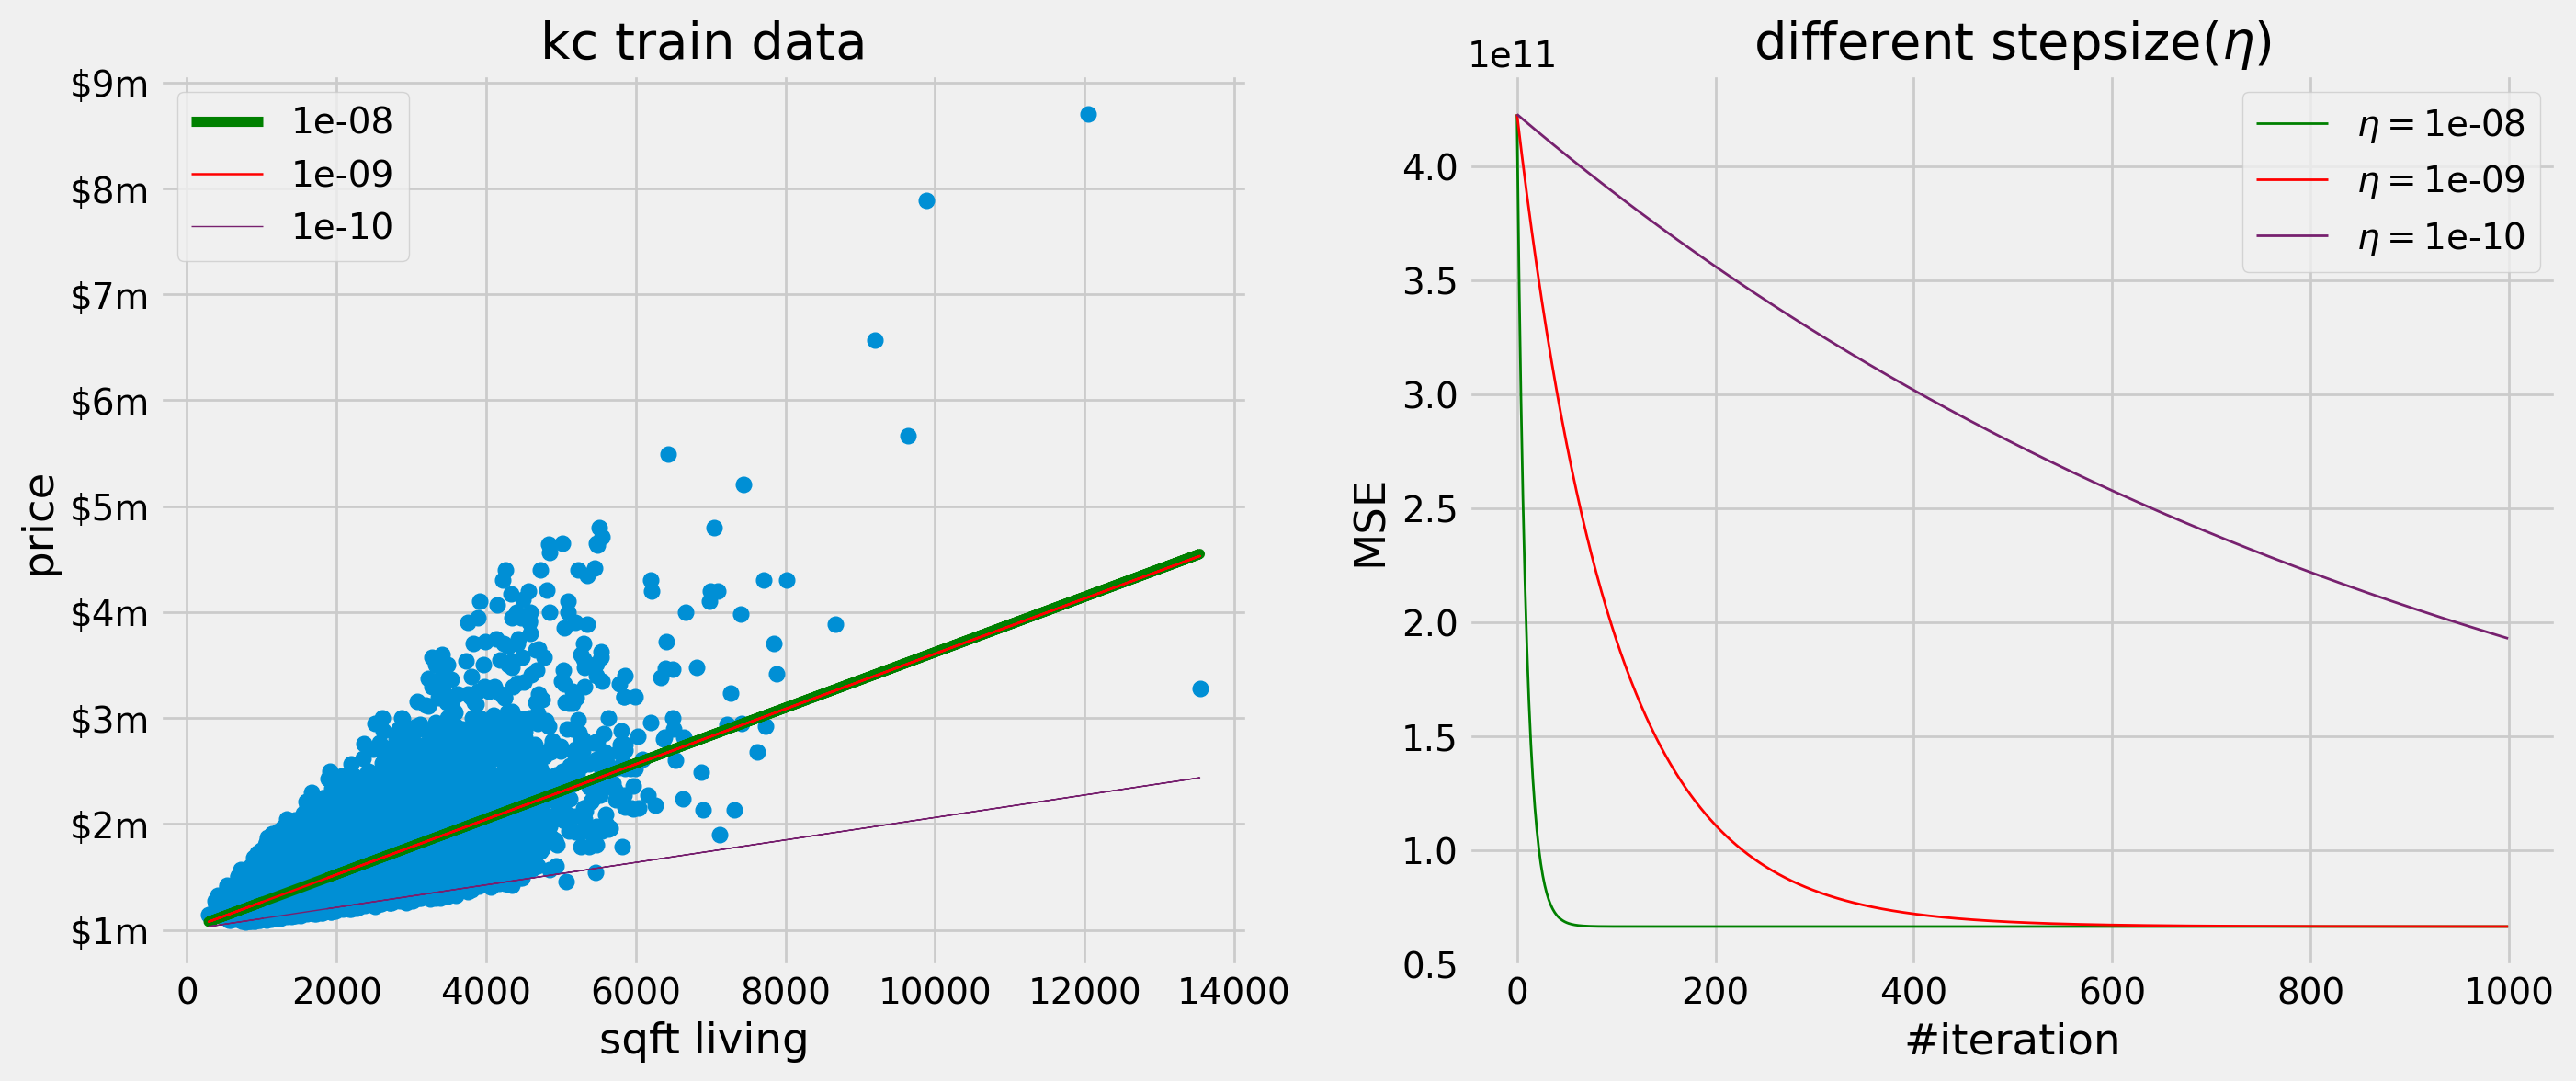

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
ax1.scatter(kc_train['sqft_living'], kc_train['price'])

eta = [1e-8, 1e-9, 1e-10] # step-size/learning rate
lw = [4, .9, .5]          # line width
color = ['green', 'red', '#77216F']
for i in range(len(eta)):
    w, cost_mse = gd(kc_train['sqft_living'], kc_train['price'], eta[i], 1000)
    print('intercept, w1..wn:', w)
    prediction = w[0] + kc_train['sqft_living'].values.reshape(kc_train.shape[0],1) @ w[1:].T

    ax1.plot(kc_train['sqft_living'], prediction, label=eta[i], lw=lw[i], color=color[i])
    ax2.plot(cost_mse, label=f'$\eta = ${eta[i]}', color=color[i], lw=1)

ax1.legend()
ax2.legend()

ax1.set(title='kc train data', xlabel='sqft living', ylabel='price')
ax2.set(title='different stepsize($\eta$)', xlabel='#iteration', ylabel='MSE')


dis = lambda x: f'${int(x * 1e-6)}m'

locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
_ = ax1.set_yticklabels(locs_label);

### stepsize(eta)
> the `1e-8` eta converged faster than the other etas <br>

### fit the best line to the test data
> training with train data then fit the model to the test data

intercept, w1..wn: [8.76011049e-02 2.62091544e+02]


/tmp/ipykernel_2391/4006930217.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax1.set_yticklabels(locs_label)


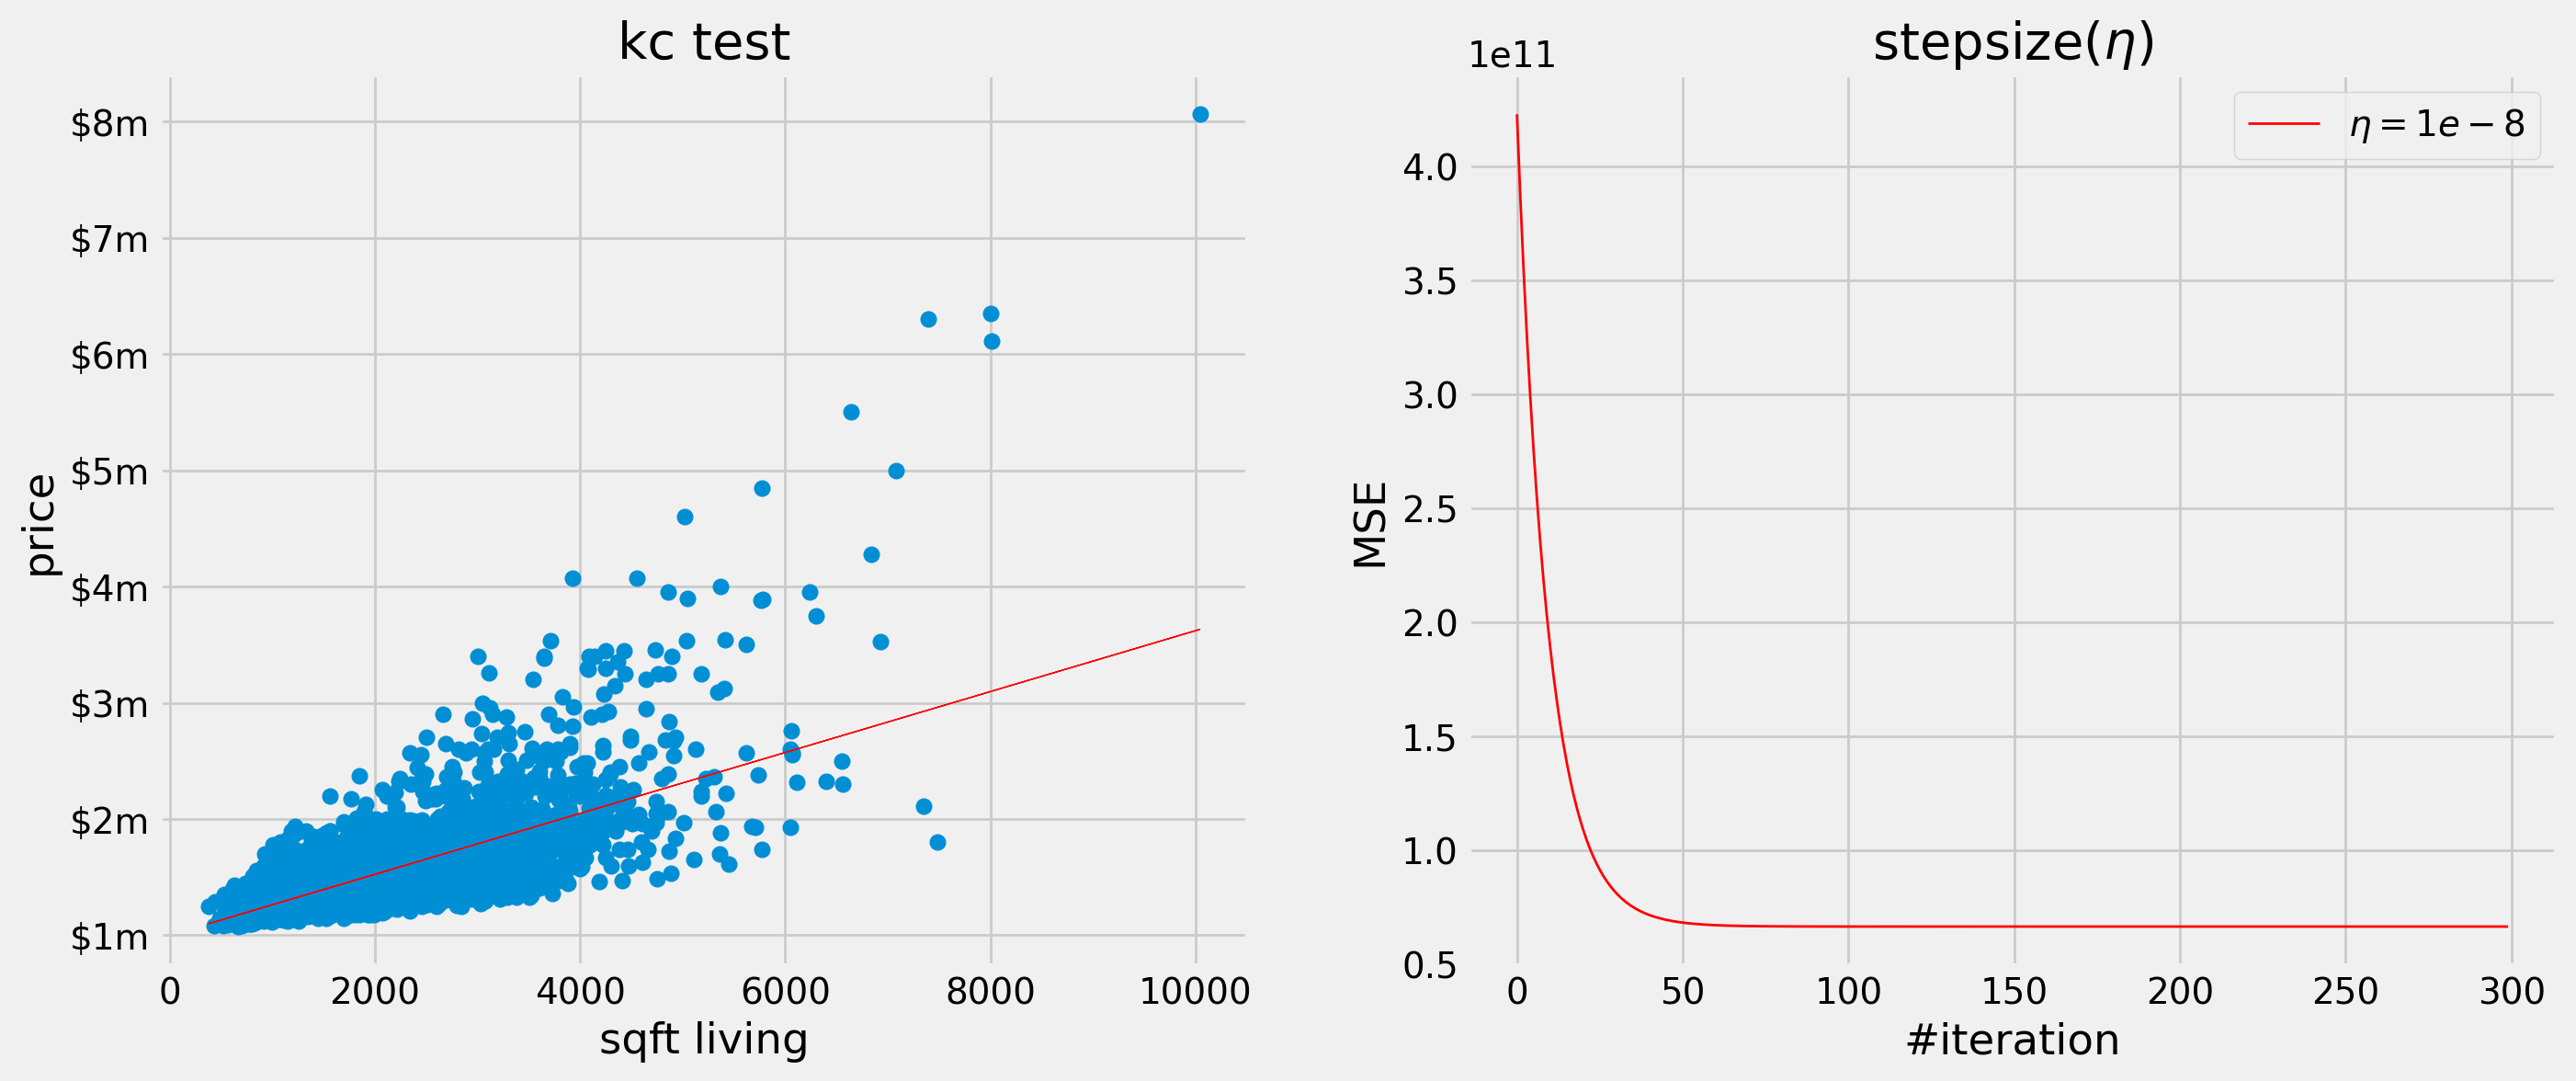

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=200)

ax1.scatter(kc_test['sqft_living'], kc_test['price'])

w, cost_mse = gd(kc_train['sqft_living'], kc_train['price'], 1e-8, 300)
print('intercept, w1..wn:', w)


# to predict using test data
prediction = w[0] + kc_test['sqft_living'].values.reshape(kc_test.shape[0],1) @ w[1:].T

ax1.plot(kc_test['sqft_living'], prediction, label='1e-8', lw=lw[i], color='red')
ax2.plot(cost_mse, label='$\eta = 1e-8$', color='red', lw=1)

ax1.set(title='kc test', xlabel='sqft living', ylabel='price')
ax2.set(title='stepsize($\eta$)', xlabel='#iteration', ylabel='MSE')
ax2.legend()

dis = lambda x: f'${int(x * 1e-6)}m'
locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
_ = ax1.set_yticklabels(locs_label)

## Gradient Descent as multivariate regression

In [8]:
kc = pd.read_csv(file_csv, usecols=['price', 'sqft_living', 'bedrooms'])
kc.head()

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


### train/test split

In [9]:
kc_train, kc_test = kc.loc[pct_20 + 1:], kc.loc[:pct_20]
kc_train.reset_index(drop=True, inplace=True)
kc_train.head()

,price,bedrooms,sqft_living
0,455000.0,3,1870
1,459500.0,4,2060
2,371000.0,4,1610
3,289500.0,3,2120
4,395000.0,3,1450


### using 2 features `sqft_living` and `bedrooms`

intercept, w1..wn: [7.02963506e-02 2.63088943e+02 1.40479713e-01]
intercept, w1..wn: [9.43666459e-02 2.43380271e+02 3.29130830e-01]
intercept, w1..wn: [2.37598823e-02 5.99375955e+01 8.45864842e-02]


/tmp/ipykernel_2391/4174190933.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax1.set_yticklabels(locs_label)
/tmp/ipykernel_2391/4174190933.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax3.set_yticklabels(locs_label)


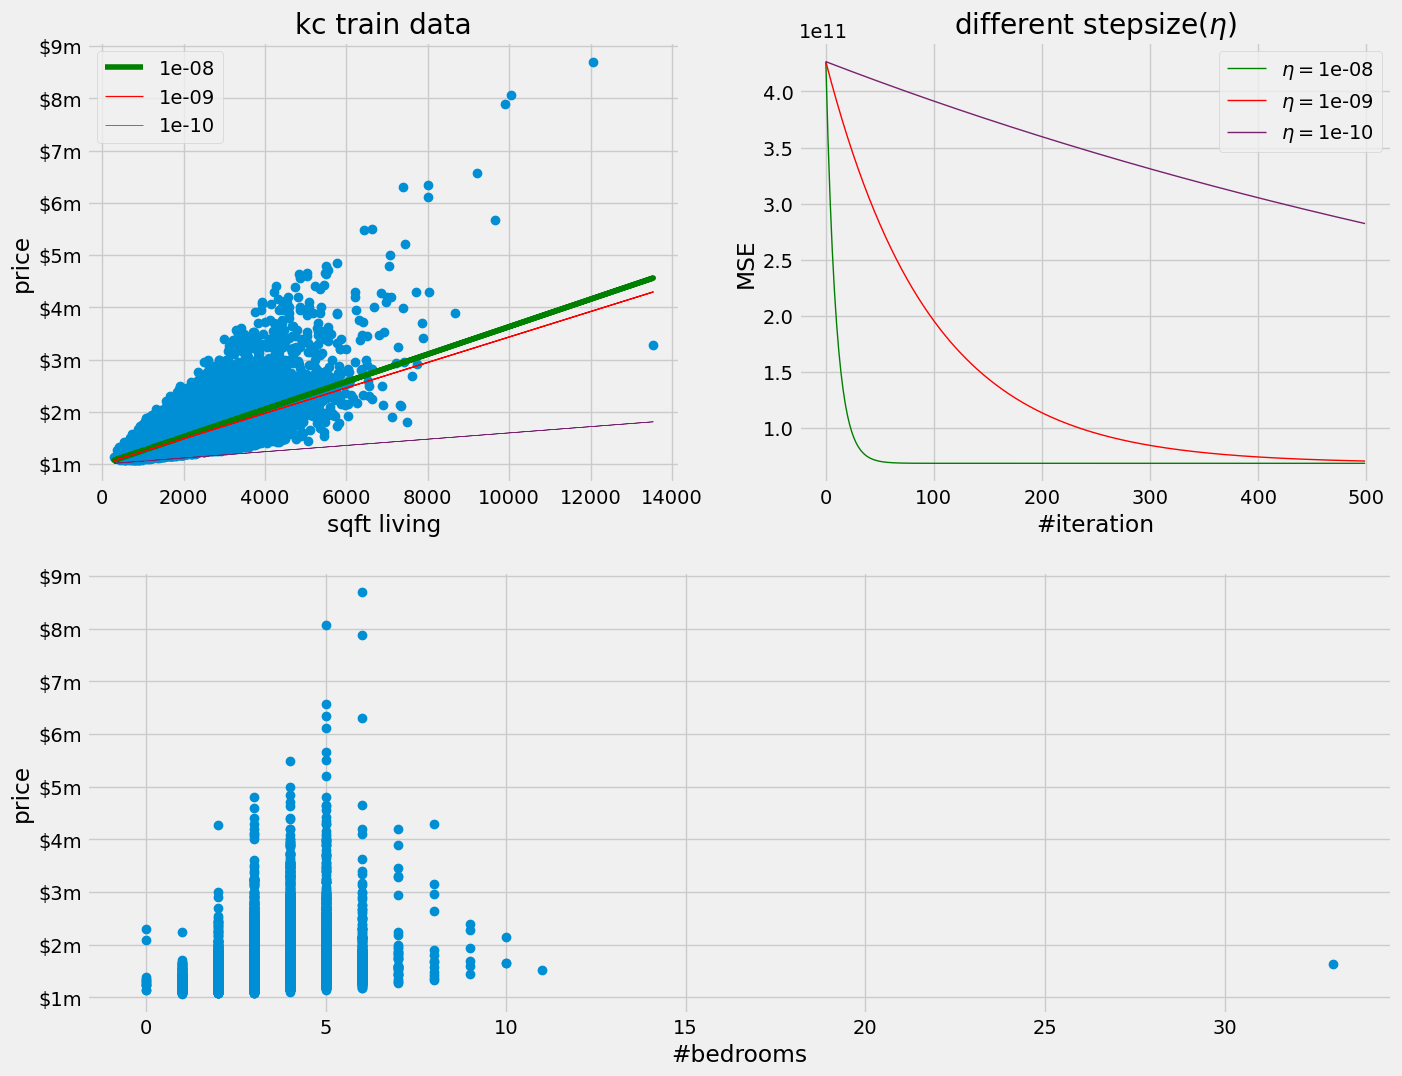

In [10]:
plt.figure(figsize=(15, 12))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, (3,4))

ax1.scatter(kc['sqft_living'], kc['price'], lw=1)
ax3.scatter(kc['bedrooms'], kc['price'], lw=1)

eta = [1e-8, 1e-9, 1e-10] # step-size/learning rate
lw = [4, .9, .5]
color = ['green', 'red', '#77216F']

for i in range(len(eta)):
    w, cost_mse = gd(kc[['sqft_living', 'bedrooms']], kc['price'], eta[i], 500)
    print('intercept, w1..wn:', w)
    
    prediction = w[0] + kc[['sqft_living', 'bedrooms']] @ w[1:].T
    ax1.plot(kc['sqft_living'], prediction, label=eta[i], lw=lw[i], color=color[i])
    ax2.plot(cost_mse, label=f'$\eta=${eta[i]}', color=color[i], lw=1)

ax1.legend()
ax2.legend()

ax1.set(title='kc train data', xlabel='sqft living', ylabel='price')
ax2.set(title='different stepsize($\eta$)', xlabel='#iteration', ylabel='MSE')
ax3.set(xlabel='#bedrooms', ylabel='price')

dis = lambda x: f'${int(x * 1e-6)}m'
locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]

_ = ax1.set_yticklabels(locs_label)
_ = ax3.set_yticklabels(locs_label)

#### fit the best line to the test data

w0, w1..wn:  [8.76006545e-02 2.62091174e+02 2.46868356e-01]


/tmp/ipykernel_2391/648990894.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax1.set_yticklabels(locs_label)


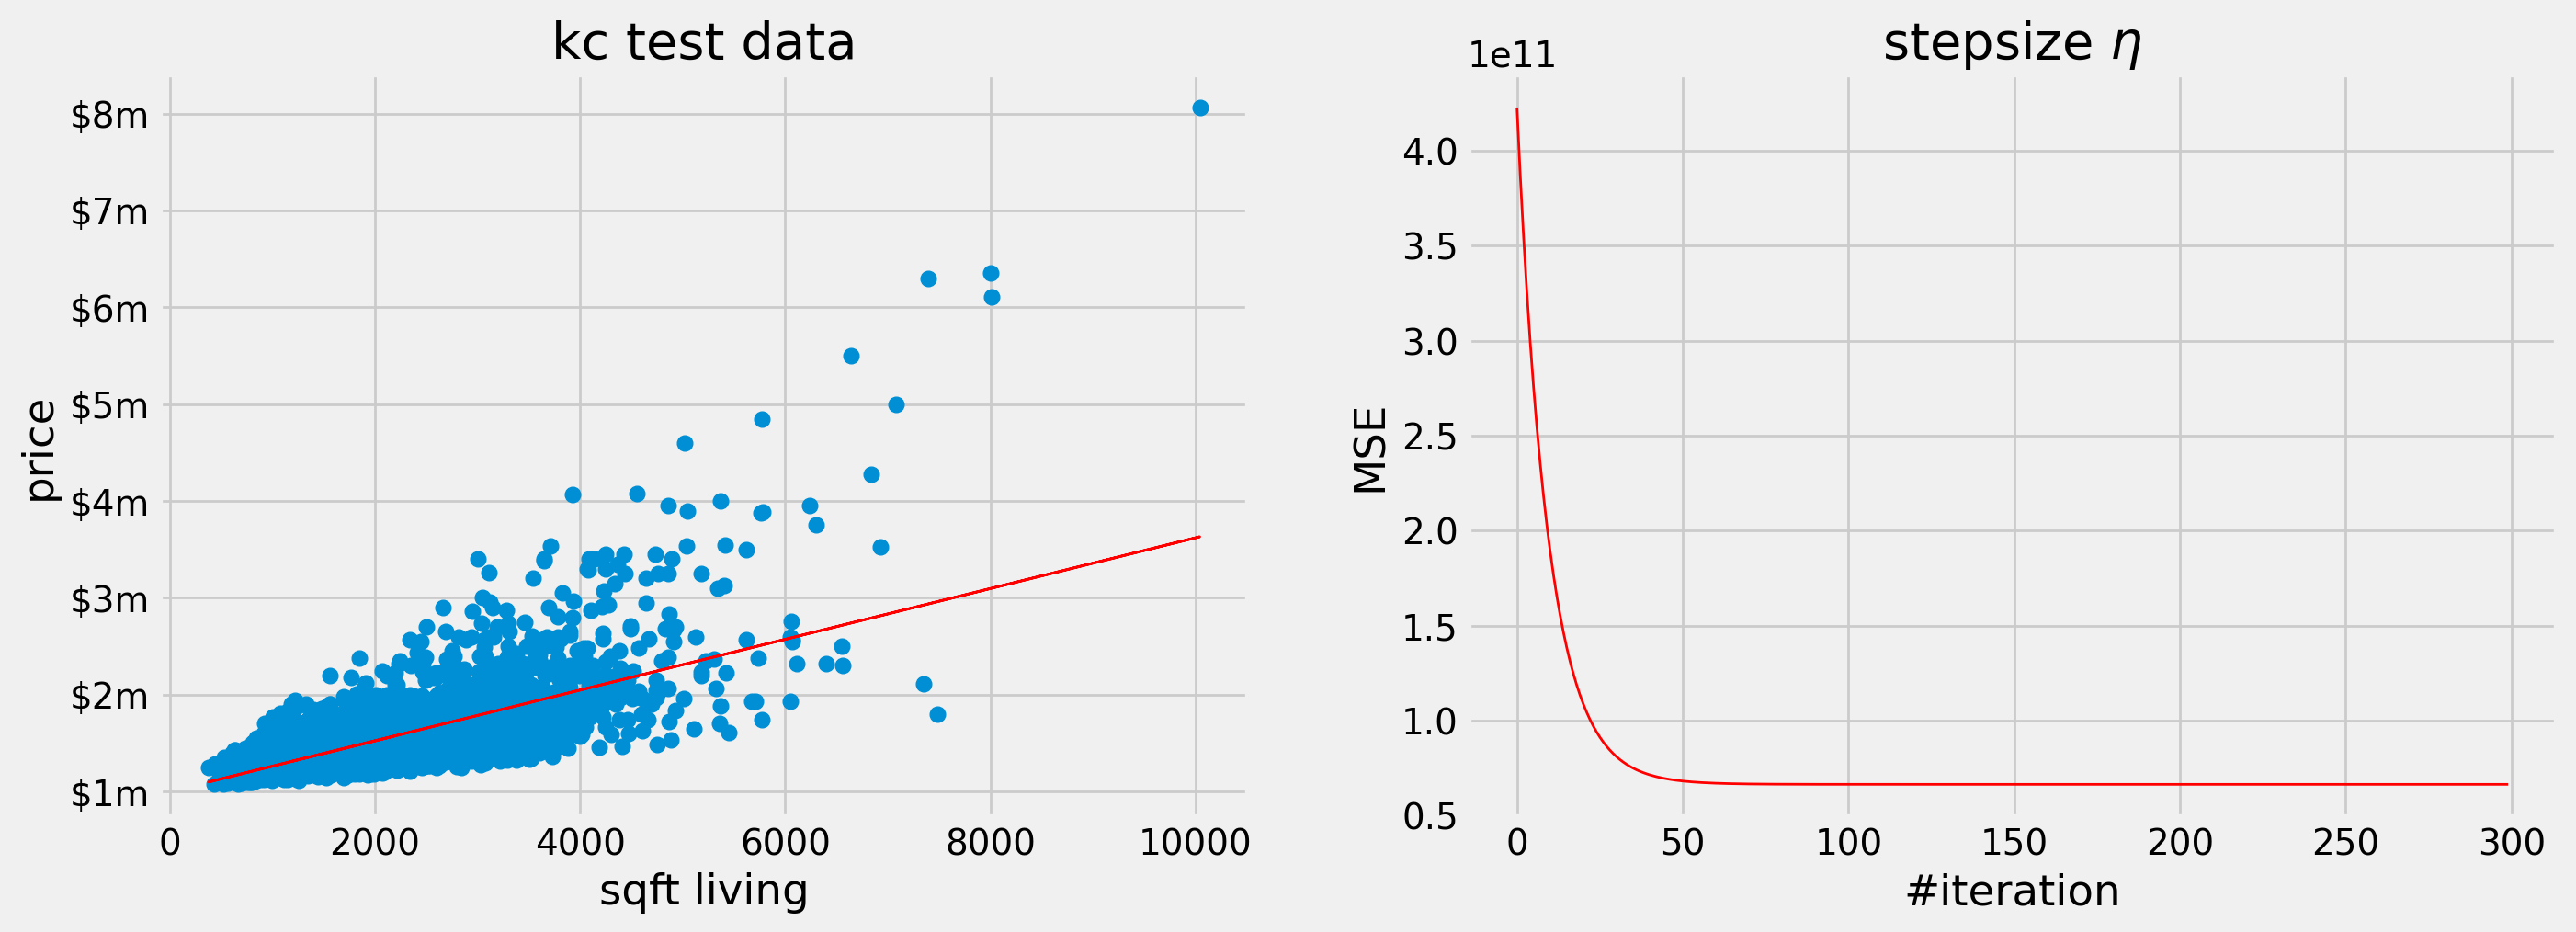

In [11]:
w, cost_mse = gd(kc_train[['sqft_living', 'bedrooms']], kc_train['price'], 1e-8, 300)
print('w0, w1..wn: ', w)
predicted_price = w[0] + kc_test[['sqft_living', 'bedrooms']] @ w[1:].T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

ax1.scatter(kc_test['sqft_living'], kc_test['price'])
ax1.set(title='kc test data', xlabel='sqft living', ylabel='price')
ax1.plot(kc_test['sqft_living'], predicted_price, color='r', lw=1)

ax2.plot(cost_mse, lw=1, color='r')
ax2.set(title='stepsize $\eta$', xlabel='#iteration', ylabel='MSE')

locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
_ = ax1.set_yticklabels(locs_label)

# set Gradient Descent to zero

$\nabla MSE(W) = \frac{1}{n} [x^T (xw^T - y)] = 0$

\begin{equation} \tag{1}
\frac{1}{n} x^T xw^T - \frac{1}{n} x^Ty = 0
\end{equation}

\begin{equation} \tag{2}
\frac{1}{n} x^T xw^T = \frac{1}{n} x^Ty 
\end{equation}

\begin{equation} \tag{3}
x^T xw^T = x^Ty 
\end{equation}

\begin{equation} \tag{4}
\underbrace{(x^Tx)^{-1} x^Tx}_{I}  w^T = (x^Tx)^{-1} x^Ty 
\end{equation}

\begin{equation} \tag{5}
w^T = (x^Tx)^{-1} x^Ty
\end{equation}

In [12]:
!head -1 kc_house_data.csv

head: cannot open 'kc_house_data.csv' for reading: No such file or directory


In [13]:
kc = pd.read_csv(file_csv, 
                 usecols=['price', 'sqft_living', 'sqft_above', 'sqft_basement'])
kc['w0'] = 1
kc.head()

,price,sqft_living,sqft_above,sqft_basement,w0
0,221900.0,1180,1180,0,1
1,538000.0,2570,2170,400,1
2,180000.0,770,770,0,1
3,604000.0,1960,1050,910,1
4,510000.0,1680,1680,0,1


In [14]:
kc_test, kc_train = kc.loc[:pct_20], kc.loc[pct_20 + 1:]
kc_train.reset_index(drop=True, inplace=True)
kc_train.head()

,price,sqft_living,sqft_above,sqft_basement,w0
0,455000.0,1870,1470,400,1
1,459500.0,2060,1190,870,1
2,371000.0,1610,1610,0,1
3,289500.0,2120,2120,0,1
4,395000.0,1450,1160,290,1


In [15]:
def gd2zero(x, y):
    w = np.linalg.inv(x.T @ x) @ x.T @ y
    return w
    

## prediction, using `sqft_living` and `sqft_basement` features

In [16]:
features = ['w0', 'sqft_living', 'sqft_basement']
w = gd2zero(kc_train[features], kc_train['price'])
p = kc_test[features].values @ w # price prediction
w

0   -33504.645789
1      272.301280
2       21.978751
dtype: float64

/tmp/ipykernel_2391/611048763.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(locs_label);
/tmp/ipykernel_2391/611048763.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(locs_label);


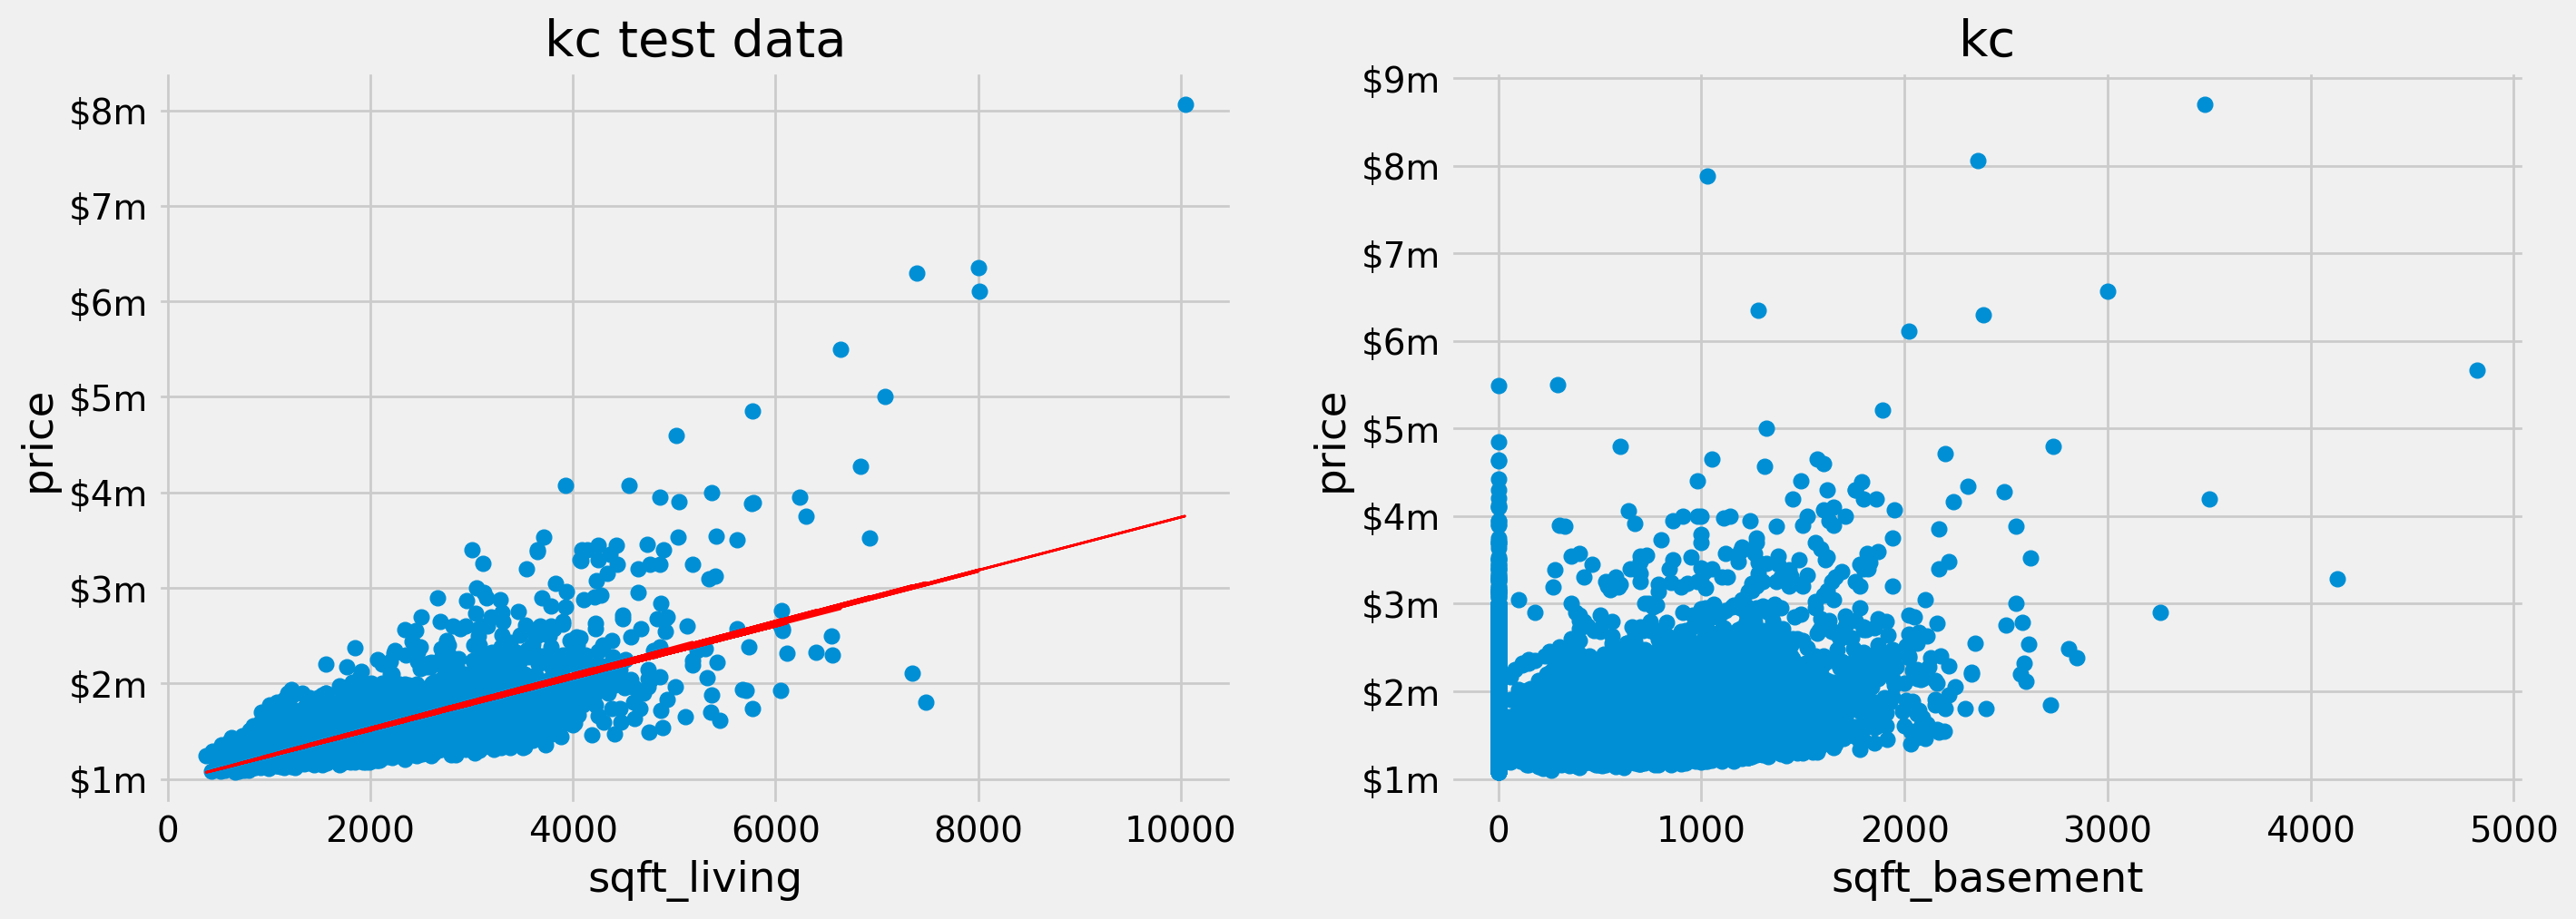

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

ax1.scatter(kc_test['sqft_living'], kc_test['price'])
ax1.plot(kc_test['sqft_living'], p, lw=1, color='r')

ax1.set(title='kc test data', xlabel='sqft_living', ylabel='price')
locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
ax1.set_yticklabels(locs_label);


ax2.scatter(kc['sqft_basement'], kc['price'])
ax2.set(title='kc', xlabel='sqft_basement', ylabel='price')
locs = ax2.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
ax2.set_yticklabels(locs_label);

## prediction, using `sqft_living` and `sqft_above` features

In [18]:
features = ['w0', 'sqft_living', 'sqft_above']
w = gd2zero(kc_train[features], kc_train['price'])
p = kc_test[features].values @ w # price prediction
w

0   -33504.645789
1      294.280031
2      -21.978751
dtype: float64

/tmp/ipykernel_2391/896352527.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(locs_label);
/tmp/ipykernel_2391/896352527.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(locs_label);


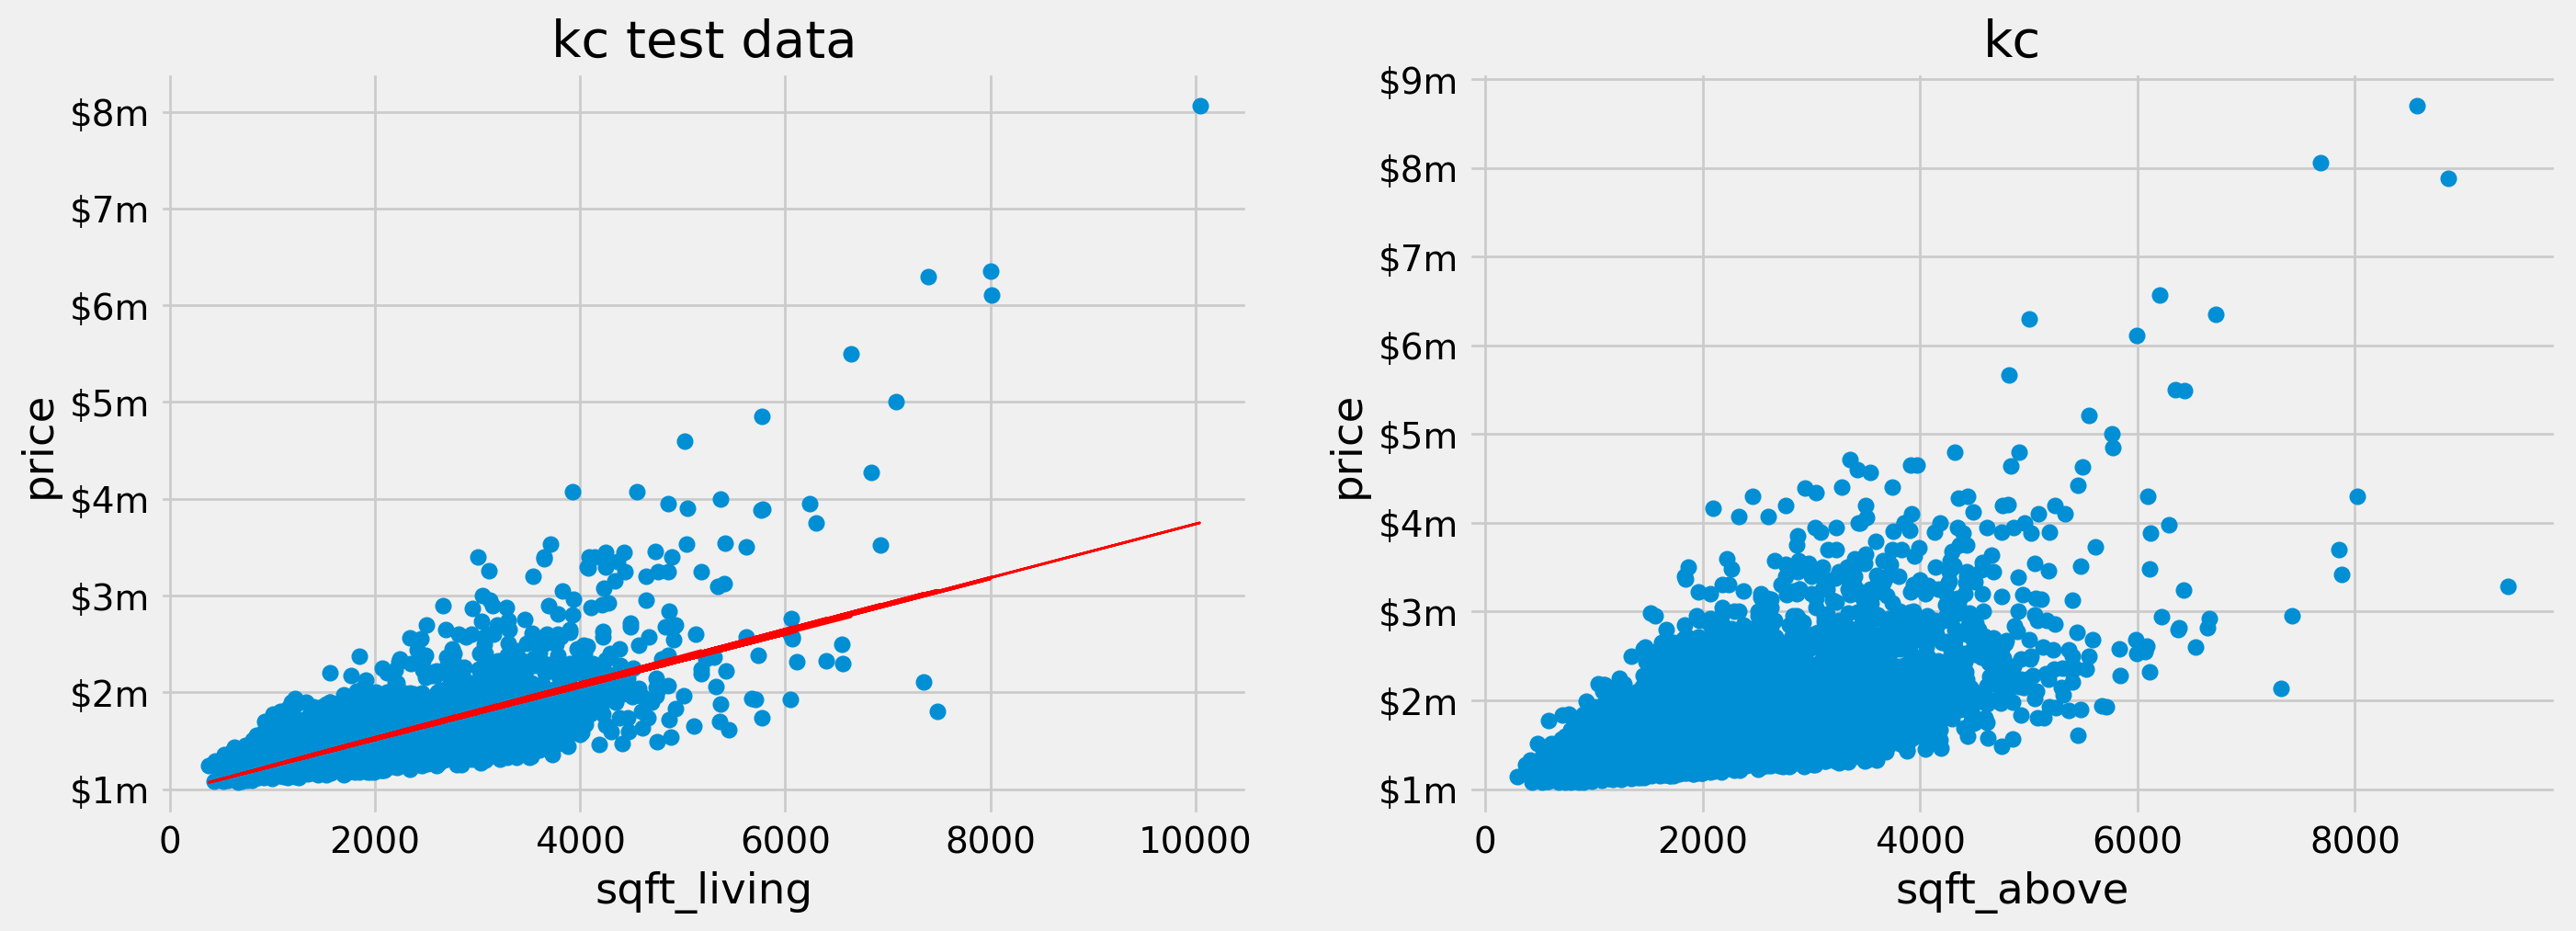

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

ax1.scatter(kc_test['sqft_living'], kc_test['price'])
ax1.plot(kc_test['sqft_living'], p, lw=1, color='r')

ax1.set(title='kc test data', xlabel='sqft_living', ylabel='price')
locs = ax1.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
ax1.set_yticklabels(locs_label);


ax2.scatter(kc['sqft_above'], kc['price'])
ax2.set(title='kc', xlabel='sqft_above', ylabel='price')
locs = ax2.get_yticks()
locs_label = [dis(i) for i in locs[1:]]
ax2.set_yticklabels(locs_label);